<h1 align="center"><font size="5">Fashion-MNIST Project</font></h1>

In this project, I will deploy and train a Convolutional Neural Network with PyTorch to recognize fashion clothes from pictures. MNIST data will be used to train and verify this model.

1. [Section 1](#id_1)- Preparation
2. [Section 2](#id_2)- 1. Create a Dataset Class
3. [Section 3](#id_3)- 2. Create a Convolutional Neural Network class
4. [Section 4](#id_4)- Results

# <a id='id_1'></a> Preparation

In [1]:
# PyTorch Modules

from torch.utils.data import Dataset, DataLoader

from torchvision import transforms
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
torch.manual_seed(0)

In [2]:
# Other non-PyTorch Modules

from matplotlib.pyplot import imshow
import matplotlib.pylab as plt

from PIL import Image

In [7]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

<hr>

# <a id='id_2'></a> 1. Create a Dataset Class

In this section, you will load a Dataset object and transform the dataset. U
    <li> <code> Resize </code> to resize the image.</li>
    <li> <code> ToTensor </code> to concert the image to a tensor.</li>
</ol>

Use the compose function ot compse the 

In [4]:
IMAGE_SIZE = 16

transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
transforms.ToTensor()#
composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])

Create two dataset objects for the Fashion MNIST  dataset. One for training data called <code> dataset_train </code> and one for validation data <code>dataset_val</code>. 

In [5]:

dataset_train=dsets.FashionMNIST(root= '.fashion/data', train=True, transform=composed,  download=True)
dataset_val=dsets.FashionMNIST(root= '.fashion/data', train=False, transform=composed, download=True)


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting .fashion/data/FashionMNIST/raw/train-images-idx3-ubyte.gz to .fashion/data/FashionMNIST/raw


  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting .fashion/data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to .fashion/data/FashionMNIST/raw


  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting .fashion/data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to .fashion/data/FashionMNIST/raw


  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting .fashion/data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to .fashion/data/FashionMNIST/raw
Processing...
Done!


/usr/local/Caskroom/miniforge/base/lib/python3.8/site-packages/torchvision/datasets/mnist.py:479: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /tmp/pip-req-build-mrus52me/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


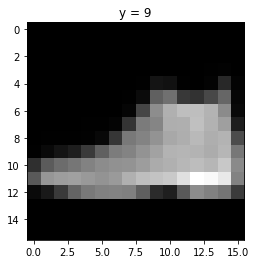

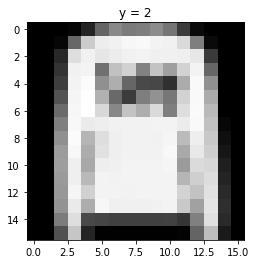

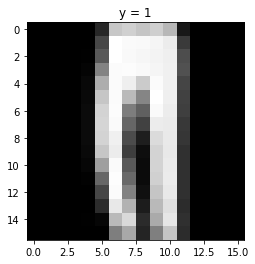

In [8]:
for n,data_sample in enumerate(dataset_val):

    show_data(data_sample)
    plt.show()
    if n==2:
        break 

 # <a id='id_3'></a> 2. Create a Convolutional Neural Network class

Constructor  using Batch Norm 

In [9]:
class CNN_batch(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        super(CNN_batch, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.conv1_bn = nn.BatchNorm2d(out_1)

        self.maxpool1=nn.MaxPool2d(kernel_size=2)
        
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.conv2_bn = nn.BatchNorm2d(out_2)

        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
        self.bn_fc1 = nn.BatchNorm1d(10)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x=self.conv1_bn(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x=self.conv2_bn(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x=self.bn_fc1(x)
        return x

Constructor  for regular Convolutional Neural Network

In [10]:
class CNN(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

train loader  and validation loader 

In [19]:
train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=100 )
test_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=100 )

Convolutional Neural Network object 

In [20]:
#model = CNN(out_1=16, out_2=32,number_of_classes=10)
model =CNN_batch(out_1=16, out_2=32,number_of_classes=10)

Code used to train the model 

In [21]:
import time
start_time = time.time()

cost_list=[]
accuracy_list=[]
N_test=len(dataset_val)
learning_rate =0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, momentum=0.3)
criterion = nn.CrossEntropyLoss()
n_epochs=15
for epoch in range(n_epochs):
    cost=0
    model.train()
    for x, y in train_loader:
        optimizer.zero_grad()
        z = model(x)
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
        cost+=loss.item()
    correct=0
    #perform a prediction on the validation  data 
    model.eval()
    for x_test, y_test in test_loader:
        z = model(x_test)
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
    accuracy = correct / N_test
    accuracy_list.append(accuracy)
    cost_list.append(cost)
    print("Done", int(((epoch+1))*100//n_epochs))  # %

Done 6
Done 13
Done 20
Done 26
Done 33
Done 40
Done 46
Done 53
Done 60
Done 66
Done 73
Done 80
Done 86
Done 93
Done 100


 # <a id='id_4'></a> Results

To plot the Cost and accuracy for each epoch for the training and testing data, respectively. 

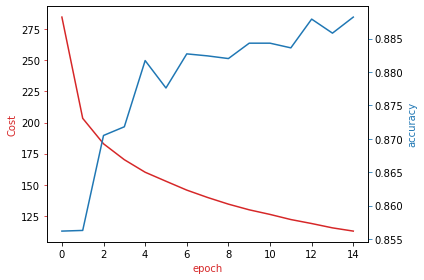

In [22]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

dataset: https://github.com/zalandoresearch/fashion-mnist